In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [4]:
# 1. Load the dataset
df = pd.read_csv('bank.csv')

# 2. Data Preprocessing
# Encode the target variable 'deposit' (yes=1, no=0)
le = LabelEncoder()
df['deposit'] = le.fit_transform(df['deposit'])

# Convert categorical variables into dummy/indicator variables (One-Hot Encoding)
# We drop the first category to avoid the dummy variable trap
df_encoded = pd.get_dummies(df, drop_first=True)

# Define Features (X) and Target (y)
X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']

# 3. Split the data into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize and train the Decision Tree Classifier
# We set max_depth=4 to keep the tree readable and prevent overfitting
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# 5. Make Predictions
y_pred = clf.predict(X_test)



In [5]:
# 6. Model Evaluation
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy Score: 0.7716

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      1166
           1       0.73      0.84      0.78      1067

    accuracy                           0.77      2233
   macro avg       0.78      0.77      0.77      2233
weighted avg       0.78      0.77      0.77      2233



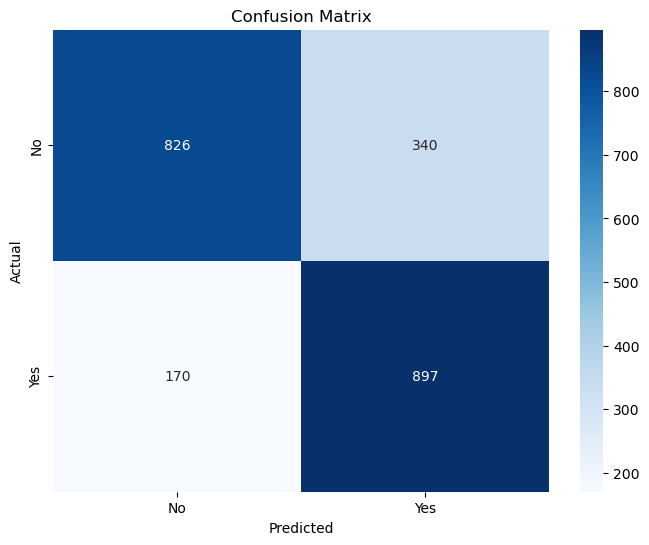

In [6]:
# 7. Visualization - Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()



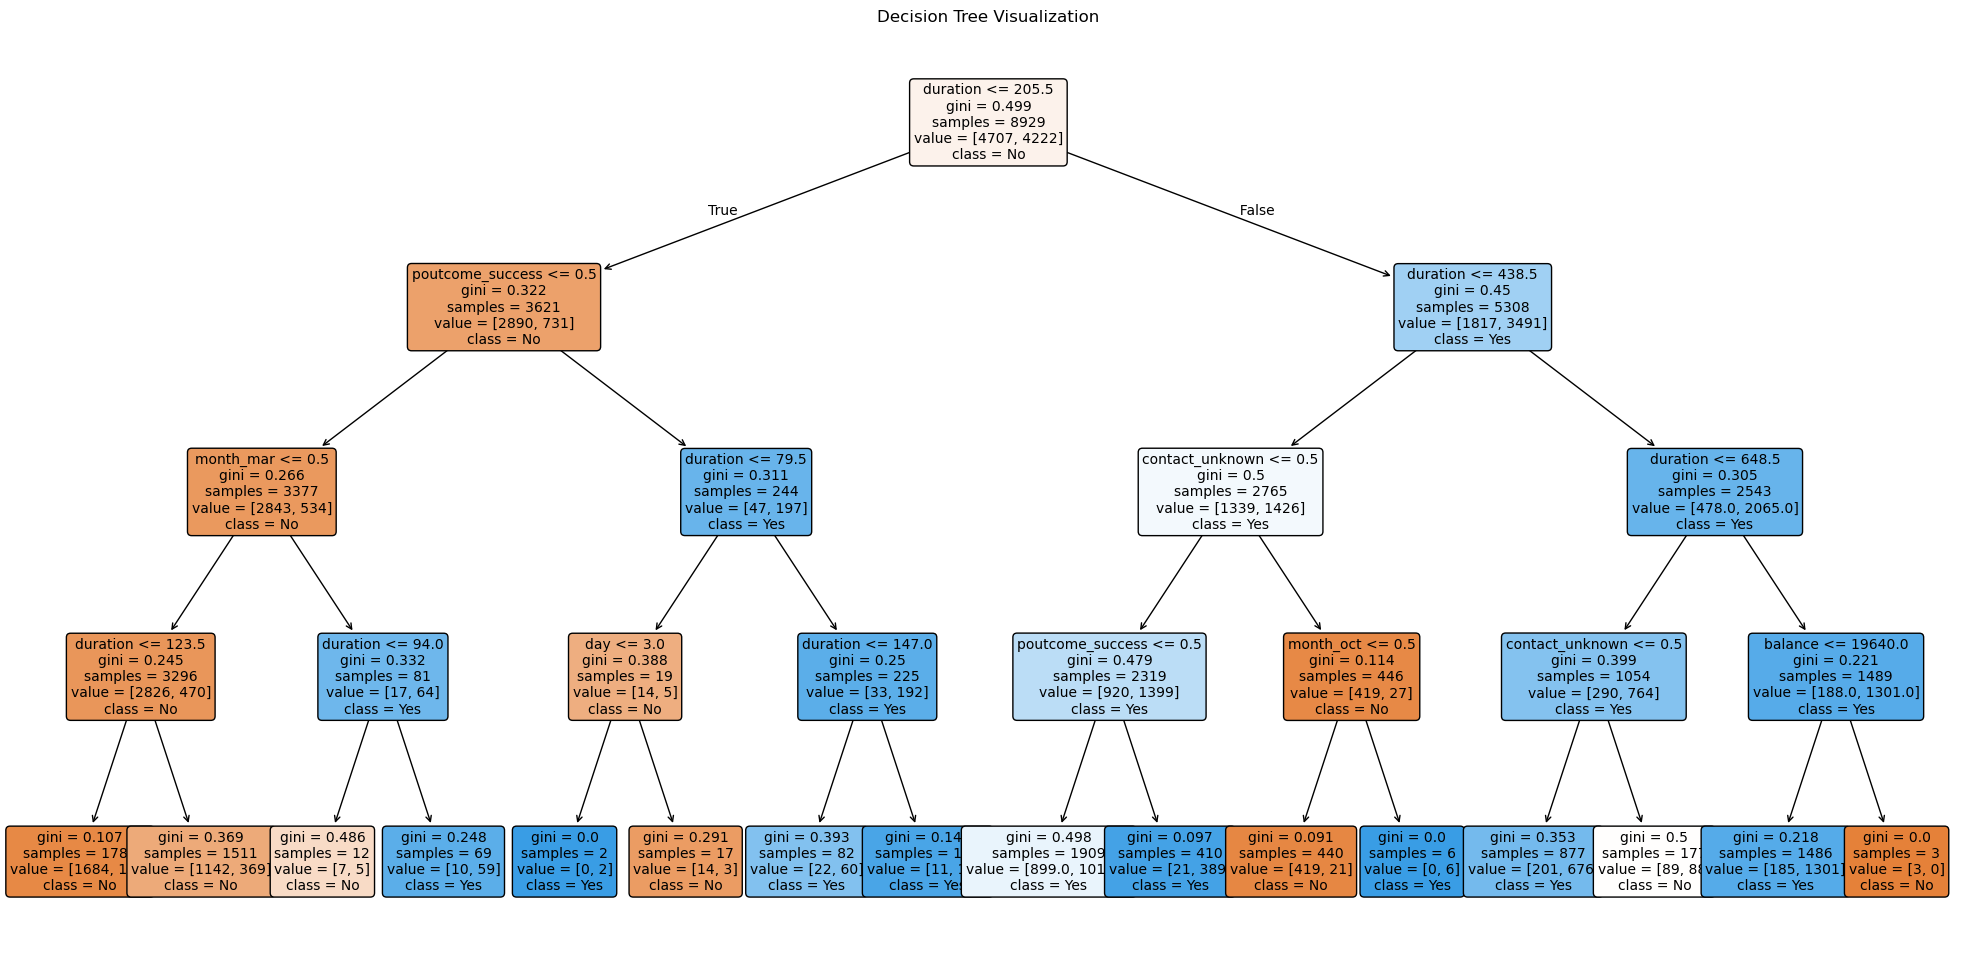

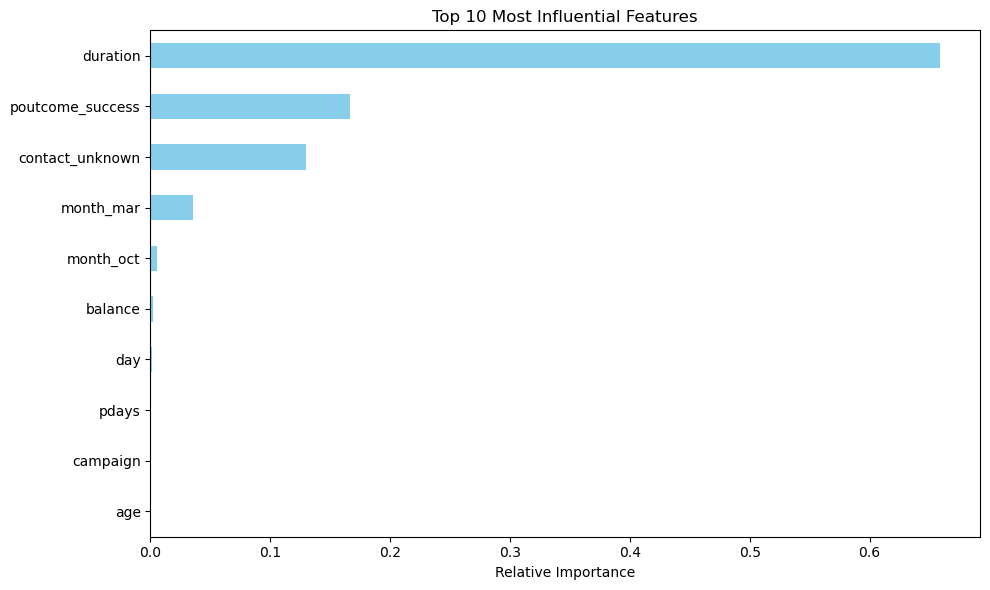

In [7]:
# 8. Visualization - Decision Tree Structure
plt.figure(figsize=(25, 12))
plot_tree(clf, 
          feature_names=X.columns.tolist(), 
          class_names=['No', 'Yes'], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.savefig('decision_tree.png')
plt.show()

# 9. Visualization - Feature Importances
importances = pd.Series(clf.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
importances.nlargest(10).sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Influential Features')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()